In [1]:
%load_ext autoreload
import sys
sys.path.append("../..")

In [2]:
%matplotlib inline

In [3]:
%autoreload

import matplotlib
matplotlib.rc_file('../matplotlibrc')
import matplotlib.pyplot as plt
import pickle

import numpy as np
from scipy.interpolate import interp1d

import darkhistory.physics as phys
import darkhistory.low_energy.atomic as atomic
import darkhistory.low_energy.bound_free as bf
import main

In [4]:
from config import load_data
from darkhistory.spec.spectrum import Spectrum
import darkhistory.spec.spectools as spectools
binning = load_data('binning')

In [5]:
from tqdm import tqdm_notebook as tqdm
from scipy.integrate import solve_ivp

# Reproducing case-B Recombination Coefficients

In [90]:
rs_vec = 10**np.arange(1,4,.1)
Tr_vec = phys.TCMB(rs_vec)
Tm_vec = phys.Tm_std(rs_vec)
length = len(rs_vec)

In [91]:
def alpha_recomb_full_Kot(T_over_rydberg):
    return (
        8.414*(np.log(1 + 1./T_over_rydberg) + 3.499) * (phys.alpha**4 * phys.c * phys.bohr_rad**2) 
        / (T_over_rydberg**0.5 + 0.6517*T_over_rydberg +   0.2138*T_over_rydberg**(3/2))
    )
def alpha_recomb_1_Kot(T_over_rydberg):
    return (
        17.41 * (phys.alpha**4 * phys.c * phys.bohr_rad**2) 
        / (T_over_rydberg**0.5 + 0.3593*T_over_rydberg**(7/6) + 0.1471*T_over_rydberg**(3/2))
    )

In [92]:
# Tm^1/2 * alpha_B from Hummer 1994 MNRAS
Tm_alphaB_Hummer = np.array([
    9.283e-11, 8.823e-11, 8.361e-11,
    7.898e-11, 7.435e-11, 6.973e-11,
    6.512e-11, 6.054e-11, 5.599e-11,
    5.147e-11, 4.700e-11, 4.258e-11,
    3.823e-11, 3.397e-11, 2.983e-11,
    2.584e-11, 2.204e-11, 1.847e-11,
    1.520e-11, 1.226e-11, 9.696e-12,
    7.514e-12, 5.710e-12, 4.257e-12,
    3.117e-12, 2.244e-12, 1.590e-12,
    1.110e-12, 7.642e-13, 5.199e-13,
3.498e-13])

#Convert to eV
Tm_Hummer = 10**np.arange(1,7.2,.2)*phys.kB

alphaB_Hummer = interp1d(Tm_Hummer, Tm_alphaB_Hummer/np.sqrt(Tm_Hummer/phys.kB))

In [93]:
%autoreload
# alpha_B requires many excited states to converge (see Hummer Fig. 1)
nmax = 100
Delta_f = lambda a : 0

alpha_tot=np.zeros(length)
alpha_tot_Hongwan=np.zeros(length)
for i, rs in enumerate(rs_vec):
    Tm = phys.Tm_std(rs)

#     k2_tab, g = atomic.populate_k2_and_g(nmax, Tm)
#     alpha = atomic.populate_alpha(Tm, phys.TCMB(rs)/1e20, nmax, k2_tab, g)
#     alpha_tot[i] = np.sum(alpha)
    alpha_tot_Hongwan[i] = bf.alpha_B(Tm,stimulated_emission=False, n=nmax)
    print(rs, alpha_tot_Hongwan[i])
    
#!!! Need to double-check the stimulated emission coefficient

10.0 5.5344162261919e-11
12.589254117941675 4.368832247897746e-11
15.848931924611142 3.4453299250783654e-11
19.952623149688808 2.7089105761398057e-11
25.11886431509582 2.123071189941004e-11
31.622776601683825 1.6591391903813416e-11
39.81071705534978 1.2936943420926838e-11
50.1187233627273 1.0074567151842763e-11
63.09573444801943 7.849919216241529e-12
79.4328234724283 6.132512063374792e-12
100.0000000000002 4.818262322528516e-12
125.89254117941701 3.81749524767936e-12
158.48931924611173 3.0564762078902656e-12
199.5262314968885 2.475981923428687e-12
251.18864315095874 2.031865392917588e-12
316.2277660168389 1.6852229128825303e-12
398.1071705534986 1.4098520499740566e-12
501.18723362727405 1.1863263639824714e-12
630.9573444801956 1.0004487368220872e-12
794.3282347242846 8.440255641516813e-13
1000.0000000000041 7.11866910892566e-13
1258.9254117941725 5.989855990675507e-13
1584.8931924611206 5.02505558173915e-13
1995.262314968889 4.2022438774713324e-13
2511.8864315095925 3.501749752503277e-

In [94]:
if nmax==10:
    alpha_tot10 = alpha_tot.copy()
elif nmax==20:
    alpha_tot20 = alpha_tot.copy()
elif nmax==50:
    alpha_tot50 = alpha_tot.copy()
elif nmax==100:
    alpha_tot100 = alpha_tot.copy()
elif nmax==300:
    alpha_tot300 = alpha_tot.copy()

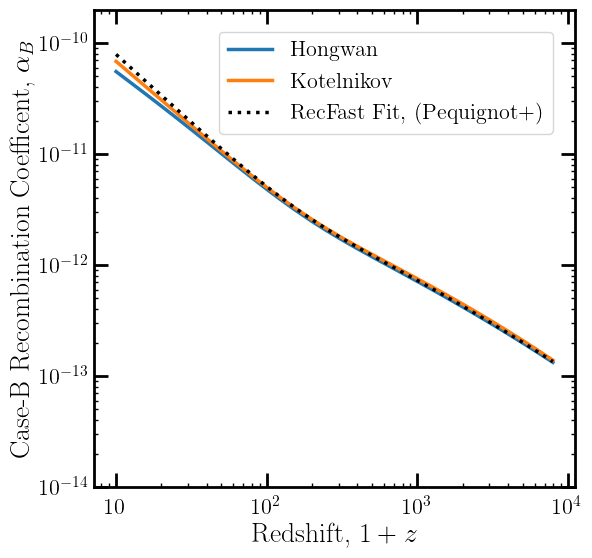

In [96]:
plt.figure()
plt.loglog()
plt.ylim([1e-14,2e-10])

# plt.plot(rs_vec[Tm_vec>8e-4], alphaB_Hummer(Tm_vec[Tm_vec>8e-4]), label='Hummer 1994')

# plt.plot(rs_vec, alpha_tot10, label=r'DH, $n_{\mathrm{max}}=10$')
# plt.plot(rs_vec, alpha_tot20, label=r'DH, $n_{\mathrm{max}}=20$')
# plt.plot(rs_vec, alpha_tot50, label=r'DH, $n_{\mathrm{max}}=50$')
# plt.plot(rs_vec, alpha_tot100, label=r'DH, $n_{\mathrm{max}}=100$')
# plt.plot(rs_vec, alpha_tot300, label=r'DH, $n_{\mathrm{max}}=300$')

plt.plot(rs_vec, alpha_tot_Hongwan, label=r'Hongwan')

tmp = alpha_recomb_full_Kot(Tm_vec/phys.rydberg)-alpha_recomb_1_Kot(Tm_vec/phys.rydberg)
plt.plot(rs_vec, tmp, label=r'Kotelnikov')
plt.plot(rs_vec, phys.alpha_recomb(Tm_vec, 'HI')/1.125, label='RecFast Fit, (Pequignot+)', color='k', linestyle=':')
plt.xlabel(r'Redshift, $1+z$', fontsize=20)
plt.ylabel(r'Case-B Recombination Coefficent, $\alpha_B$', fontsize=20)
plt.legend()

$\beta_B$ is obtained by detailed balance. 
First, use $x_i \beta_i \sim \frac1{g_i}e^{-E_i/T_m}\alpha_i$.
Next, assume $x_i = x_{2s}\frac{g_i}{g_{2s}} e^{-(E_2-E_i)/T_m}$. 
Finally, write the ionization term in the $x_e$ evolution equation as 
$$
\sum_i \beta_i x_i = x_{2s}\frac{g_i}{g_{2s}} e^{-(E_2-E_i)/T_m} \sim x_{2s}e^{-E_2/T_m} \alpha_B \sim \beta_B x_{2s}
$$
So a cross-cheeck of $\alpha_B$ is a cross-check of $\beta_B$.

# Deviations from TLA Assumptions

The TLA assumes that the excited states obey the detailed balance condition
$$
\begin{alignat}{1}
	\frac{x_i}{x_{2s}} = g_i e^{-(E_i-E_\alpha)/T} \, ,
\end{alignat}
$$
that the $n=2$ state obeys
$$
\begin{alignat}{1}
	x_2 = & \frac{x_{1s}e^{-E_\alpha/T} (3 R_{\text{Ly}\alpha} + \Lambda_{2s}) + x_e^2 n_H \alpha_\text{B}}{
	\frac34 R_{\text{Ly}\alpha} + \frac14 \Lambda_{2s} + \beta_\text{B}}   \, ,
\end{alignat}
$$
and that the substates satisfy 
$$
\begin{alignat}{1}
	x_{2p} = & \frac34 x_2 \\
    x_{2s} = & \frac14 x_2 \, .
\end{alignat}
$$

We also assume that the excited state abundances are so exponentially suppressed that $$x_{1s} = 1-x_e \, .$$
Let us now see if we can reproduce this behavior.

In [97]:
%autoreload
rs_vec  = 10**np.arange(1,4.55,.01)
Tr_vec  = phys.TCMB(rs_vec)
Tm_vec  = phys.Tm_std(rs_vec)

length  = len(rs_vec)

xe_vec  = phys.xHII_std(rs_vec)
x1s_vec = phys.xHI_std(rs_vec)
nH_vec  = phys.nH * rs_vec**3

tau_vec = atomic.tau_np_1s(2,rs_vec)
x2s_vec = atomic.x2s_steady_state(rs_vec, Tr_vec, Tm_vec, xe_vec, x1s_vec, tau_vec)
x2_vec  = 4*x2s_vec

In [98]:
def g_nl(l): return 2*l +1
def E(n): return phys.rydberg/n**2
hc = 2*np.pi*phys.hbar * phys.c

### Checking Detailed Balance

In [99]:
%autoreload

#Detailed Balance between recombination and ionization
rs = 3e3
Tr = phys.TCMB(rs)
Tm = Tr#phys.Tm_std(rs)
xe = phys.xHII_std(rs)
nH = phys.nH * rs**3
x1s = phys.xHI_std(rs)

nmax=9
new_switch=True
R = atomic.populate_radial(nmax)
BB = atomic.populate_bound_bound(nmax, Tr, R, Delta_f=Delta_f)
k2_tab, g = atomic.populate_k2_and_g(nmax, Tm)
alpha = atomic.populate_alpha(Tm, Tr, nmax, k2_tab, g, Delta_f=Delta_f, new_switch=new_switch)
beta = atomic.populate_beta(Tm, Tr, nmax, k2_tab, g, Delta_f=Delta_f, new_switch=new_switch)

hplanck=2*np.pi*phys.hbar
lam_T = hplanck*phys.c/(2*np.pi * phys.mu_ep * Tr)**(1/2)

for n in np.arange(1,nmax+1):
    for l in np.arange(0,n):
        fac = np.exp(phys.rydberg/n**2/Tr)*g_nl(l)*lam_T**3
        if new_switch:
            fac *= ((1/2*phys.mu_ep*phys.alpha**2)/phys.rydberg)**(3/2)
        
        print(n,l,':', beta[n][l]/alpha[n][l] * fac)

1 0 : 0.9999999999999992
2 0 : 1.0
2 1 : 0.9999999999999999
3 0 : 1.0000000000000004
3 1 : 1.0000000000000002
3 2 : 1.0000000000000004
4 0 : 1.0000000000000004
4 1 : 1.0000000000000004
4 2 : 1.0000000000000004
4 3 : 1.0000000000000004
5 0 : 1.0000000000000002
5 1 : 1.0000000000000002
5 2 : 1.0000000000000007
5 3 : 1.0
5 4 : 0.9999999999999997
6 0 : 1.0000000000000002
6 1 : 1.0000000000000004
6 2 : 1.0000000000000004
6 3 : 1.0000000000000004
6 4 : 1.0000000000000002
6 5 : 1.0000000000000007
7 0 : 1.0000000000000004
7 1 : 1.0000000000000004
7 2 : 1.0000000000000002
7 3 : 1.0000000000000004
7 4 : 1.0
7 5 : 1.0000000000000007
7 6 : 1.0
8 0 : 1.0000000000000002
8 1 : 1.0
8 2 : 1.0000000000000004
8 3 : 1.0000000000000004
8 4 : 1.0000000000000007
8 5 : 1.0000000000000004
8 6 : 1.0000000000000004
8 7 : 1.0
9 0 : 0.9999999999999997
9 1 : 0.9999999999999999
9 2 : 0.9999999999999997
9 3 : 0.9999999999999998
9 4 : 0.9999999999999998
9 5 : 1.0
9 6 : 1.0
9 7 : 1.0000000000000002
9 8 : 1.000000000000

In [100]:
%autoreload
#Saha equilibrium

rhs = lam_T**-3 / (phys.nH*rs**3) * np.exp(-phys.rydberg/Tr)
phys.xHI_std(rs) * rhs/xe**2

0.9999999999999999

In [101]:
#The main discrepancy comes from the fact that 
#this quantity doesn't keep track of stimulated emission

phys.alpha_recomb(Tr,'HI')/1.125

3.0849766757476206e-13

In [102]:
bf.alpha_B(Tr, T_r=Tr, stimulated_emission=False, f_gamma=None, n=100)

3.035234831208717e-13

In [103]:
bf.alpha_B(Tr, T_r=Tr, stimulated_emission=True, f_gamma=None, n=100)

8.381778979913012e-13

In [104]:
%autoreload
lam_T = hc/(2*np.pi * phys.mu_ep * Tr)**(1/2)
bf.beta_B(Tr,100) * np.exp(phys.rydberg/4 / Tr)*lam_T**3 * 4

8.381778979913006e-13

In [105]:
# The main discrepancy comes from stimulated emission
bf.beta_B(Tr,300)

3895924.5018236106

In [106]:
phys.beta_ion(Tr,'HI')

1242495.87664493

In [107]:
# Detailed Balance amongst the bound-bound transition rates
print('n1 l n2')
n1,l = 1,0
for n2 in np.arange(2,nmax+1):
    Ennp = E(n1)-E(n2)
    print(n1,'',l,n2,':',
          BB['up'][n1][n2][l]/(BB['dn'][n2][n1][l+1])/(
         np.exp(-Ennp/Tr)*g_nl(l+1)/g_nl(l)))
for n1 in np.arange(2,nmax+1):
    for n2 in np.arange(1,n1):
        for l in np.arange(1,n2):
            Ennp = E(n1)-E(n2)
            print(n1,'',l,n2,':',
                  BB['dn'][n1][n2][l]/(BB['up'][n2][n1][l-1])/(
                 np.exp(-Ennp/Tr)*g_nl(l-1)/g_nl(l)))

n1 l n2
1  0 2 : 1.0000000000000002
1  0 3 : 1.0000000000000002
1  0 4 : 0.9999999999999999
1  0 5 : 0.9999999999999998
1  0 6 : 0.9999999999999999
1  0 7 : 1.0000000000000002
1  0 8 : 1.0
1  0 9 : 0.9999999999999998
3  1 2 : 1.0
4  1 2 : 1.0
4  1 3 : 1.0
4  2 3 : 0.9999999999999999
5  1 2 : 0.9999999999999991
5  1 3 : 0.9999999999999997
5  2 3 : 0.9999999999999998
5  1 4 : 1.0
5  2 4 : 0.9999999999999998
5  3 4 : 1.0000000000000002
6  1 2 : 1.0000000000000002
6  1 3 : 1.0
6  2 3 : 0.9999999999999999
6  1 4 : 1.0
6  2 4 : 1.0
6  3 4 : 1.0
6  1 5 : 1.0
6  2 5 : 0.9999999999999997
6  3 5 : 1.0
6  4 5 : 0.9999999999999999
7  1 2 : 1.0
7  1 3 : 1.0
7  2 3 : 0.9999999999999999
7  1 4 : 0.9999999999999999
7  2 4 : 1.0
7  3 4 : 1.0
7  1 5 : 1.0000000000000002
7  2 5 : 1.0
7  3 5 : 1.0000000000000004
7  4 5 : 1.0000000000000002
7  1 6 : 1.0000000000000002
7  2 6 : 1.0000000000000002
7  3 6 : 1.0000000000000002
7  4 6 : 1.0
7  5 6 : 1.0000000000000002
8  1 2 : 0.9999999999999999
8  1 3 : 0.9999

In [108]:
print('n1 l n2')
for n1 in np.arange(2,nmax+1):
    for n2 in np.arange(1,n1):
        for l in np.arange(1,n2):
            Ennp = E(n1)-E(n2)
            print(n1,'',l,n2,':',
                  BB['dn'][n1][n2][l]/(BB['up'][n2][n1][l-1])/(
                 np.exp(-Ennp/Tr)*g_nl(l-1)/g_nl(l)))

n1 l n2
3  1 2 : 1.0
4  1 2 : 1.0
4  1 3 : 1.0
4  2 3 : 0.9999999999999999
5  1 2 : 0.9999999999999991
5  1 3 : 0.9999999999999997
5  2 3 : 0.9999999999999998
5  1 4 : 1.0
5  2 4 : 0.9999999999999998
5  3 4 : 1.0000000000000002
6  1 2 : 1.0000000000000002
6  1 3 : 1.0
6  2 3 : 0.9999999999999999
6  1 4 : 1.0
6  2 4 : 1.0
6  3 4 : 1.0
6  1 5 : 1.0
6  2 5 : 0.9999999999999997
6  3 5 : 1.0
6  4 5 : 0.9999999999999999
7  1 2 : 1.0
7  1 3 : 1.0
7  2 3 : 0.9999999999999999
7  1 4 : 0.9999999999999999
7  2 4 : 1.0
7  3 4 : 1.0
7  1 5 : 1.0000000000000002
7  2 5 : 1.0
7  3 5 : 1.0000000000000004
7  4 5 : 1.0000000000000002
7  1 6 : 1.0000000000000002
7  2 6 : 1.0000000000000002
7  3 6 : 1.0000000000000002
7  4 6 : 1.0
7  5 6 : 1.0000000000000002
8  1 2 : 0.9999999999999999
8  1 3 : 0.9999999999999998
8  2 3 : 1.0
8  1 4 : 1.0000000000000002
8  2 4 : 1.0
8  3 4 : 1.0
8  1 5 : 0.9999999999999998
8  2 5 : 0.9999999999999999
8  3 5 : 1.0
8  4 5 : 1.0
8  1 6 : 1.0000000000000002
8  2 6 : 1.00000000

In [109]:
#Saha equilibrium at large redshift between xe = xHII and x1s ~ xHI
hc = 2*np.pi * phys.hbar*phys.c
mu_e = phys.me/(1+phys.me/phys.mp)
lam_T = hc/(2*np.pi * mu_e*Tr_vec)**(1/2)

(phys.xHI_std(rs_vec)/nH_vec/xe_vec**2)*np.exp(-E(1)/Tr_vec)/g_nl(0)/lam_T**3

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [110]:
# Undetailed balance: Seeing that each line of the MLA is satisfied 
# by x_i in LTE

num_states = int((n+1)*n/2)
states_n = np.concatenate([list(map(int,k*np.ones(k))) for k in range(1,nmax+1,1)])
states_l = np.concatenate([np.arange(k) for k in range(1,nmax+1)])

x_lte = np.zeros(num_states)
x_lte[0] = x1s
for nl in np.arange(num_states):
    n = states_n[nl]
    l = states_l[nl]
    x_lte[nl] = g_nl(l) * np.exp((E(n)-E(1))/Tr) * x1s

diff_vec = np.zeros(num_states)

def nl_vec(n,l):
    return int((n-1)*n/2)+l

# x_tmp = np.zeros(num_states)
# x_tmp[0] = x1s

# for nl in np.arange(1, num_states):
#     n = states_n[nl]
#     l = states_l[nl]
#     x_tmp[nl] = g_nl(l) * np.exp((E(n)-E(1))/Tr) * x_tmp[0]
    

for nl in np.arange(1, num_states):
    n = states_n[nl]
    l = states_l[nl]
    R_tot = np.sum(BB['dn'][n, :, l] + BB['up'][n, :, l]) + beta[n][l]
    if nl != num_states-1:
        diff_vec[nl] = (-x_lte[nl] + np.sum(
            BB['dn'][1:,n,l+1]/R_tot*x_lte[np.array([nl_vec(n,l+1) for n in np.arange(1,nmax+1)])]
            +BB['up'][1:,n,l-1]/R_tot*x_lte[np.array([nl_vec(n,l-1) for n in np.arange(1,nmax+1)])]
        ) + xe**2 * nH * alpha[n][l]/R_tot)
    else:
        diff_vec[nl] = (-x_lte[nl] + np.sum(
            BB['up'][1:,n,l-1]/R_tot*x_lte[np.array([nl_vec(n,l-1) for n in np.arange(1,nmax+1)])]
        ) + xe**2 * nH * alpha[n][l]/R_tot)
        
    if nl==1:
#         diff_vec[nl] -= BB['dn'][2,1,0]/R_tot*x_lte[1]
        diff_vec[nl] += BB['dn'][2,1,0]*np.exp((E(2)-E(1))/Tr)/R_tot*x_lte[0]
        
    print(n,l,diff_vec[nl]/x_lte[nl])
    
print(np.linalg.norm(diff_vec)/np.linalg.norm(x_lte))

2 0 4.668917149747172e-16
2 1 5.3612157280822e-16
3 0 -1.1158988923751275e-15
3 1 -1.9122211066522137e-16
3 2 -1.167764615541859e-15
4 0 2.1687042314226585e-15
4 1 4.953213368064096e-16
4 2 1.9277370945979186e-15
4 3 2.5186803110966856e-15
5 0 4.960016261403872e-16
5 1 0.0
5 2 3.1000101633774196e-16
5 3 7.085737516291245e-17
5 4 -3.6511230813111836e-16
6 0 5.887032742429433e-16
6 1 -1.700698347812947e-16
6 2 -3.139750795962364e-16
6 3 -2.466947053970429e-16
6 4 1.875128947588634e-16
6 5 9.365733908410462e-16
7 0 -2.5337429841951354e-15
7 1 -9.0490820864112e-16
7 2 -2.9138044318244054e-15
7 3 -3.024978868886029e-15
7 4 -2.825324518090608e-15
7 5 -2.5748751754970043e-15
7 6 -2.4067077933666706e-15
8 0 -4.962096541070434e-17
8 1 -9.924193082140867e-17
8 2 -7.343902880784242e-16
8 3 -2.55193536397908e-16
8 4 -7.71881684166512e-17
8 5 2.7065981133111455e-16
8 6 8.397394146426888e-16
8 7 6.798072261266494e-16
9 0 1.2687103641443744e-15
9 1 1.7620977279782976e-17
9 2 7.189358730151454e-16
9 3

In [111]:
nmax=20
skip=1

num_states = int(nmax*(nmax+1)/2)
ident = np.identity(num_states-1)
R = atomic.populate_radial(nmax)

H_engs = atomic.get_transition_energies(nmax)
num_lines = H_engs.size-1

states_n = np.concatenate([list(map(int,k*np.ones(k))) for k in range(1,nmax+1,1)])
states_l = np.concatenate([np.arange(k) for k in range(1,nmax+1)])
exc_states = np.transpose([states_n,states_l])[1:]

x_vec = np.zeros((length,num_states-1))
x_lte = np.zeros(num_states) #equilibrium solution
x_lte[0] = x1s

beta_MLA = np.zeros(length)
alpha_MLA = np.zeros(length)

new_switch = True

for i in tqdm(np.arange(0,length,skip)):#(-1,0):#(0,length,skip):
    rs = rs_vec[i]
    xe  = xe_vec[i]
    x1s = x1s_vec[i]
    
    nH  = nH_vec[i]
    Tr = Tr_vec[i]
    Tm = Tm_vec[i]
    

    #Get the transition rates
    BB = atomic.populate_bound_bound(nmax, Tr, R, Delta_f=Delta_f)
    k2_tab, g = atomic.populate_k2_and_g(nmax, Tm)
    alpha = atomic.populate_alpha(Tm, Tr, nmax, k2_tab, g, Delta_f=Delta_f, new_switch=new_switch)
    beta = atomic.populate_beta(Tm, Tr, nmax, k2_tab, g, Delta_f=Delta_f, new_switch=new_switch)

    #Include sobolev optical depth
    for n in range(2,nmax+1):
        BB['dn'][n][1][1] *= atomic.p_np_1s(n, rs, xHI=x1s)
        BB['up'][1][n][0] *= atomic.p_np_1s(n, rs, xHI=x1s)

    ### Build transition probability matrix, P_ij (i,j of excited states)
    mat = np.zeros((num_states, num_states))
    b = np.zeros(num_states)
    for nl in np.arange(num_states):
#         print(rs, xe**2 * alpha[n][l]*nH)
        # Find indices for possible states to transition to (l must change by 1)
        # Get the rates for transitioning to those states, as well as total rate

        n = states_n[nl]
        l = states_l[nl]
        x_lte[nl] = g_nl(l) * np.exp((E(n)-E(1))/Tr) * x1s
        tot_rate = np.sum(BB['dn'][n,:,l]) + np.sum(BB['up'][n,:,l]) + beta[n][l]
        
        # Construct the matrix
        if l!= 0:
            mat[nl,states_l == l-1] = BB['up'][l:,n,l-1]/tot_rate
            
        if l!= nmax-1:
            mat[nl,states_l == l+1] = BB['dn'][l+2:,n,l+1]/tot_rate

        # Special 2s->1s transition
        if nl == 0:
            mat[0][1] = BB['dn'][2][1][0]/ tot_rate
        if nl == 1:
            #Detalied Balance
            mat[1][0] = BB['dn'][2][1][0]*np.exp((E(2)-E(1))/Tr) / tot_rate
            

        # Construct the inhomogeneous term
        b[nl] += xe**2 * nH * alpha[n][l]
        if l==1:
            b[nl] += x1s*BB['up'][1, n, 0]
        elif nl==1:
            # 1s to 2s transition from detailed balance
            b[nl] += x1s*BB['dn'][2][1][0]*np.exp(-phys.lya_eng/Tr)
            
        b[nl] /= tot_rate

    #Probability matrix for only the excited states
    M = ident - mat[1:,1:]
    
    x_vec[i] = np.linalg.solve(M,b[1:])
    x_full = np.append(1-np.sum(x_vec[i])-xe, x_vec[i])
    
    for nl in np.arange(num_states):
        n, l = states_n[nl], states_l[nl]
        if nl > 0:
            beta_MLA[i]  += x_full[nl] * beta[n][l]
            alpha_MLA[i] += alpha[n][l] #* xe**2 * nH

/var/folders/kq/gkzlnb6576x8mxsf32v72_y00000gn/T/ipykernel_4224/3075732645.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(np.arange(0,length,skip)):#(-1,0):#(0,length,skip):


  0%|          | 0/355 [00:00<?, ?it/s]

/var/folders/kq/gkzlnb6576x8mxsf32v72_y00000gn/T/ipykernel_4224/3075732645.py:63: RuntimeWarning: divide by zero encountered in true_divide
  mat[nl,states_l == l+1] = BB['dn'][l+2:,n,l+1]/tot_rate
/var/folders/kq/gkzlnb6576x8mxsf32v72_y00000gn/T/ipykernel_4224/3075732645.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  mat[0][1] = BB['dn'][2][1][0]/ tot_rate
/var/folders/kq/gkzlnb6576x8mxsf32v72_y00000gn/T/ipykernel_4224/3075732645.py:81: RuntimeWarning: divide by zero encountered in double_scalars
  b[nl] /= tot_rate
/var/folders/kq/gkzlnb6576x8mxsf32v72_y00000gn/T/ipykernel_4224/3075732645.py:63: RuntimeWarning: overflow encountered in true_divide
  mat[nl,states_l == l+1] = BB['dn'][l+2:,n,l+1]/tot_rate
/var/folders/kq/gkzlnb6576x8mxsf32v72_y00000gn/T/ipykernel_4224/3075732645.py:67: RuntimeWarning: overflow encountered in double_scalars
  mat[0][1] = BB['dn'][2][1][0]/ tot_rate


$$
4\mathcal{C} \beta_B x_{1s} e^{-E_\alpha /T} = \beta_{MLA}
$$

In [112]:
ion_TLA = np.zeros(length)
ion_Hongwan_noSE = np.zeros(length)
ion_Hongwan = np.zeros(length)
# nmax = 20

for i,Tr in enumerate(tqdm(rs_vec)):
    rs = rs_vec[i]
    x2 = x2_vec[i]
    Tr = Tr_vec[i]
    
    ion_TLA[i] = phys.beta_ion(Tr,'HI') * x2
    
    #Detailed Balance factor
    lam_T = hc/np.sqrt(2*np.pi*phys.mu_ep*Tr)
    db_fac = np.exp(phys.rydberg/4 / Tr) * lam_T**3 * 4
    ion_Hongwan_noSE[i] = bf.alpha_B(Tr, T_r=Tr, stimulated_emission=False, f_gamma=None, n=nmax)/db_fac * x2
    
    ion_Hongwan[i] = bf.beta_B(Tr,nmax) * x2
    
#     print(rs, " Done")

/var/folders/kq/gkzlnb6576x8mxsf32v72_y00000gn/T/ipykernel_4224/37483958.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,Tr in enumerate(tqdm(rs_vec)):


  0%|          | 0/355 [00:00<?, ?it/s]

/var/folders/kq/gkzlnb6576x8mxsf32v72_y00000gn/T/ipykernel_4224/37483958.py:15: RuntimeWarning: overflow encountered in exp
  db_fac = np.exp(phys.rydberg/4 / Tr) * lam_T**3 * 4


/var/folders/kq/gkzlnb6576x8mxsf32v72_y00000gn/T/ipykernel_4224/976435076.py:22: RuntimeWarning: divide by zero encountered in true_divide
  axarr[1].plot(rs_vec[rs_vec>700], (beta_MLA/ion_TLA-1)[rs_vec>700],


Text(0.5, 1.0, 'Residuals')

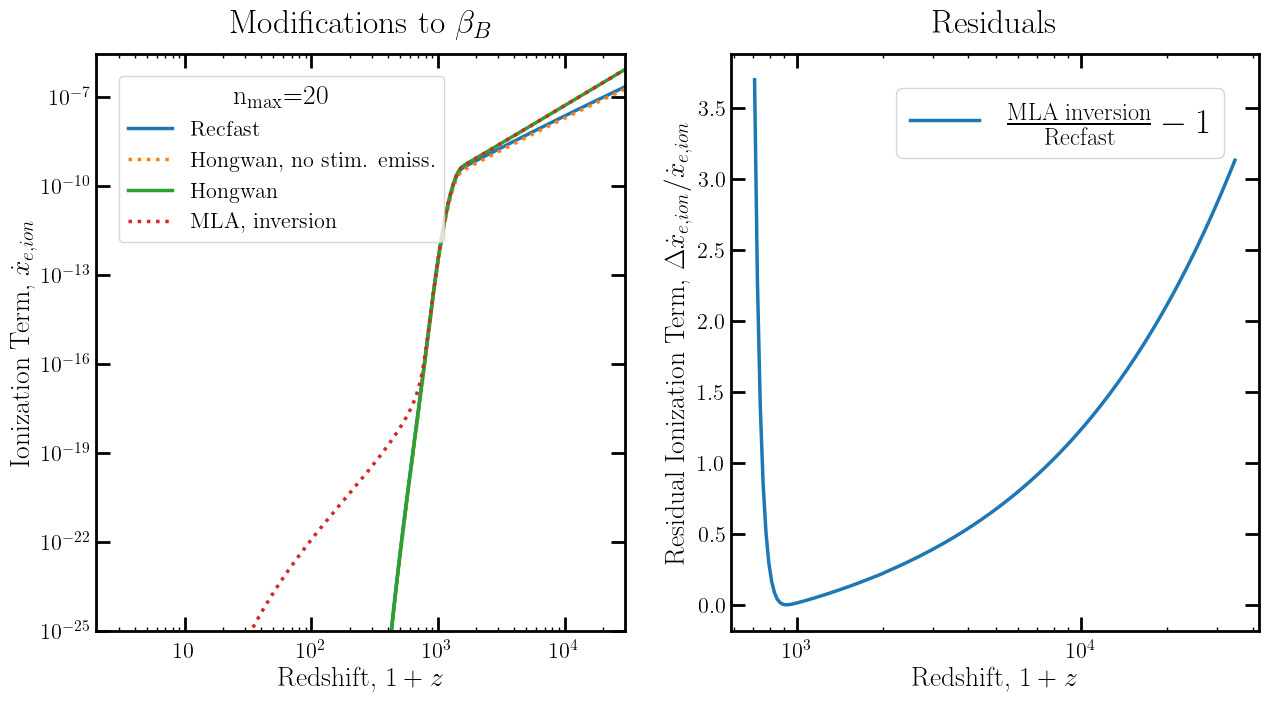

In [113]:
fig, axarr = plt.subplots(1,2, figsize=(2*7.5, 7.5))

axarr[0].loglog()
axarr[0].axis([2,3e4,1e-25,3e-6])
# plt.axis([5e2,2e4,1e-17,10])

axarr[0].plot(rs_vec,ion_TLA, label='Recfast')
axarr[0].plot(rs_vec,ion_Hongwan_noSE, label='Hongwan, no stim. emiss.', linestyle=':')
axarr[0].plot(rs_vec,ion_Hongwan, label='Hongwan')
axarr[0].plot(rs_vec,beta_MLA, label='MLA, inversion', linestyle=':')

axarr[0].legend(fontsize=12)
axarr[0].set_xlabel(r'Redshift, $1+z$', fontsize=20)
axarr[0].set_ylabel(r'Ionization Term, $\dot{x}_{e,ion}$', fontsize=20)
axarr[0].legend(title=r'$\mathrm{n_{max}}$='+str(nmax))

axarr[0].set_title(r'Modifications to $\beta_B$')



axarr[1].set_xscale('log')
axarr[1].plot(rs_vec[rs_vec>700], (beta_MLA/ion_TLA-1)[rs_vec>700], 
              label=r'$\frac{\mathrm{MLA \; inversion}}{\mathrm{Recfast}}-1$')

axarr[1].legend(fontsize=25)
axarr[1].set_xlabel(r'Redshift, $1+z$', fontsize=20)
axarr[1].set_ylabel(r'Residual Ionization Term, '+
                    r'$\Delta \dot{x}_{e,ion}/\dot{x}_{e,ion}$', fontsize=20)

axarr[1].set_title(r'Residuals')

Text(0.5, 1.0, 'Modifications to $\\alpha_B$')

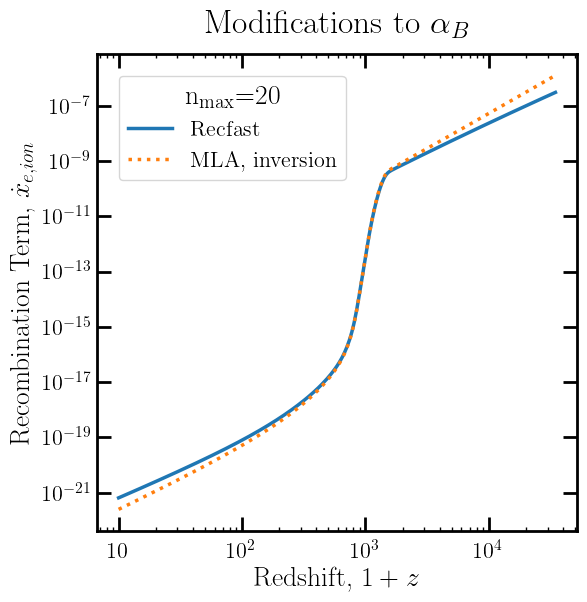

In [114]:
plt.figure()
plt.loglog()
# plt.axis([2,3e4,1e-25,3e-6])
# plt.axis([5e2,2e4,1e-17,10])

plt.plot(rs_vec,phys.alpha_recomb(Tm_vec,'HI')*nH_vec*xe_vec**2, label='Recfast')
# plt.plot(rs_vec,ion_Hongwan_noSE, label='DH, no stim. emiss.')
# plt.plot(rs_vec,ion_Hongwan, label='DH')
plt.plot(rs_vec,alpha_MLA * xe_vec**2 * nH_vec, label='MLA, inversion', linestyle=':')

plt.legend()
plt.xlabel(r'Redshift, $1+z$', fontsize=20)
plt.ylabel(r'Recombination Term, $\dot{x}_{e,ion}$', fontsize=20)
plt.legend(title=r'$\mathrm{n_{max}}$='+str(nmax))

plt.title(r'Modifications to $\alpha_B$')

In [115]:
#initialize
E_current = 0
ind_current = 0
H_engs = np.zeros((int) (nmax*(nmax-1)/2))
Nphot_cascade = H_engs.copy()

nB = phys.nB*rs_vec[i]**3


for nl in np.arange(num_states):
    n = states_n[nl]
    l = states_l[nl]

    # If this state has a new energy, add to the list of photon energies
    # Add nmax-n more indices, you'll end up with nmax(nmax-1)/2
    if E_current != E(n):

        #Start by filling from 0 to nmax-1
        if n>1:
            ind_current += nmax-n+1

        E_current = E(n)
        H_engs[ind_current:ind_current + nmax-n] = E(n)-E(np.arange(n+1,nmax+1))


    # photons from l <-> l+1 transitions
    if l<nmax-1:
        # Number of photons injected per baryon, per second
        Nphot_cascade[ind_current:ind_current + nmax-n] += nH_vec[i]*(
            x_full[(states_l == l+1) * (states_n>n)] * BB['dn'][n+1:,n,l+1] #Downscattering adds photons
            -x_full[nl] * BB['up'][n,n+1:,l] #upscattering subtracts them
        )/nB
        
    #NOTE: 'dn' and 'up' have nothing to do with down- or up-scattering, 
    # just if the l quantum number go up or down
    
    # photons from l <-> l-1 transitions
    if l>0:
        Nphot_cascade[ind_current:ind_current + nmax-n] += nH_vec[i] * ( 
            x_full[(states_l == l-1) * (states_n>n)] * BB['up'][n+1:,n,l-1] #Downscattering
            -x_full[nl] * BB['dn'][n,n+1:,l] #upscattering
        )/nB
        
# Make a spectrum
data = np.array(sorted(np.flipud(np.transpose([H_engs,Nphot_cascade])), key=lambda pair:pair[0]))
       
# Then add the two photon transitions
#!!! Tm or Tr in detailed balance?
amp_2s1s = BB['dn'][2,1,0] * (x_full[1] - x_full[0]*np.exp(-phys.lya_eng/phys.TCMB(rs)))
spec_2s1s = spectools.discretize(binning['phot'], phys.dNdE_2s1s)
spec_2s1s.switch_spec_type()

transition_spec = Spectrum(data[:,0], data[:,1], spec_type='N')
transition_spec.rebin(binning['phot'])
transition_spec.N += amp_2s1s * spec_2s1s.N

Text(0.5, 1.0, 'Distortion from Atomic Transitions')

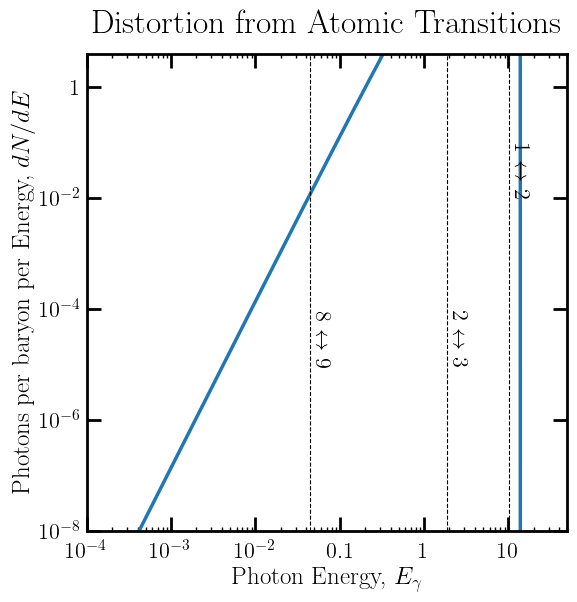

In [116]:
plt.figure()
plt.axis([1e-4,50, 1e-8, 4])
plt.loglog()
eng = transition_spec.eng
plt.plot(transition_spec.eng, eng*transition_spec.N*1e16)

plt.axvline(E(2)-E(3), linewidth=0.8, color='k', linestyle='--')
plt.text((E(2)-E(3))*1.02, 1e-5, r'2 $\leftrightarrow$ 3', fontsize=16.0, rotation=270)

plt.axvline(E(8)-E(9), linewidth=0.8, color='k', linestyle='--')
plt.text((E(8)-E(9))*1.02, 1e-5, r'8 $\leftrightarrow$ 9', fontsize=16.0, rotation=270)


plt.axvline(E(1)-E(2), linewidth=0.8, color='k', linestyle='--')
plt.text((E(1)-E(2))*1.02, 1e-2, r'1 $\leftrightarrow$ 2', fontsize=16.0, rotation=270)

# plt.axvline(E(2)-E(3), linewidth=1.0, color='k', linestyle='--', label='n=2 to 3')

plt.xlabel(r'Photon Energy, $E_{\gamma}$')
plt.ylabel(r'Photons per baryon per Energy, $dN/dE$')
plt.title('Distortion from Atomic Transitions')

Text(0.5, 1.0, 'Testing the TLA Assumptions')

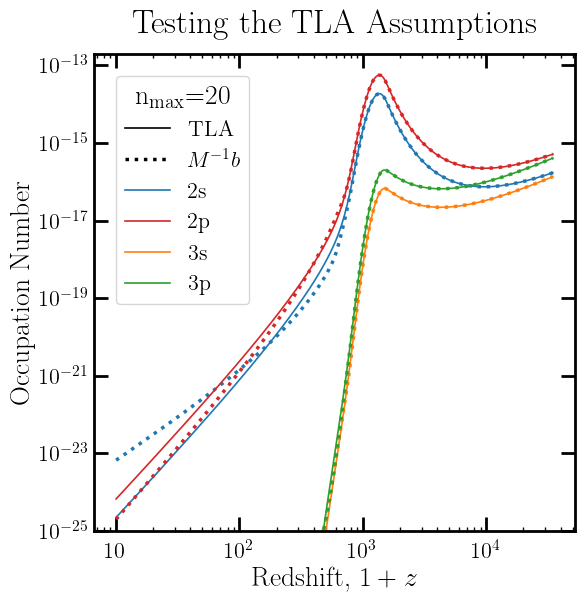

In [117]:
plt.figure()
plt.loglog()
plt.ylim([1e-25,2e-13])

x2s_vec = x2_vec/4

# plt.plot(rs_vec, xe_vec*1e-13, label=r'$x_e \times 10^{-13}$', color='k', linewidth=1.0)
# plt.plot(rs_vec, Tm_vec*1e-14, label=r'$x_e \times 10^{-13}$', color='k', linewidth=1.0)

lw=1.2

plt.plot(rs_vec, np.ones_like(rs_vec), label=r'TLA', color='k', linewidth=lw)
plt.plot(rs_vec, np.ones_like(rs_vec), label=r'$M^{-1} b$', color='k', linestyle=':')

plt.plot(rs_vec, x2s_vec, label='2s', color='C0', linewidth=lw)
plt.plot(rs_vec[::skip], x_vec[::skip,0], color='C0', linestyle=':')

plt.plot(rs_vec, 3*x2s_vec, label='2p', color='C3', linewidth=lw)
plt.plot(rs_vec[::skip], x_vec[::skip,1], color='C3', linestyle=':')

plt.plot(rs_vec, g_nl(0)*x2s_vec * np.exp((E(3)-E(2))/Tr_vec), label='3s', color='C1', linewidth=lw)
plt.plot(rs_vec[::skip], x_vec[::skip,2], color='C1', linestyle=':')

plt.plot(rs_vec, g_nl(1)*x2s_vec * np.exp((E(3)-E(2))/Tr_vec), label='3p', color='C2', linewidth=lw)
plt.plot(rs_vec[::skip], x_vec[::skip,3], color='C2', linestyle=':')

# plt.plot(rs_vec, g_nl(2)*x2s_vec * np.exp((E(3)-E(2))/Tr_vec), label='3d', color='C4', linewidth=lw)
# plt.plot(rs_vec[::skip], x_vec[::skip,4], color='C4', linestyle=':')

# plt.plot(rs_vec, g(1)*x2s_vec * np.exp((E(4)-E(2))/Tr_vec), label='4p', color='C3', linestyle=':')
# plt.plot(rs_vec, g(1)*x2s_vec * np.exp((E(5)-E(2))/Tr_vec), label='5p', color='C3', linestyle=':')

plt.xlabel(r'Redshift, $1+z$', fontsize=20)
plt.ylabel(r'Occupation Number', fontsize=20)
plt.legend(title=r'$\mathrm{n_{max}}$='+str(nmax))

plt.title(r'Testing the TLA Assumptions')

Text(0.5, 1.0, 'Testing the TLA Assumptions')

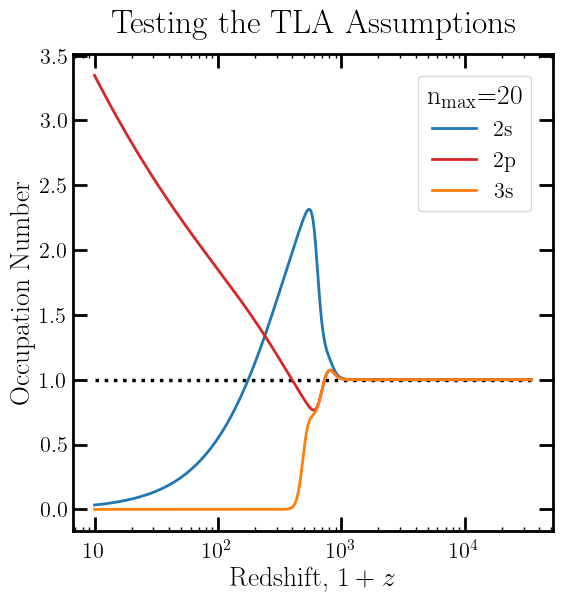

In [118]:
plt.figure()
# plt.loglog()
plt.xscale('log')
# plt.ylim([1e-25,2e-13])

x2s_vec = x2_vec/4

# plt.plot(rs_vec, xe_vec*1e-13, label=r'$x_e \times 10^{-13}$', color='k', linewidth=1.0)
# plt.plot(rs_vec, Tm_vec*1e-14, label=r'$x_e \times 10^{-13}$', color='k', linewidth=1.0)

lw=2.0

# plt.plot(rs_vec, np.ones_like(rs_vec), label=r'TLA', color='k', linewidth=lw)
plt.plot(rs_vec, np.ones_like(rs_vec), color='k', linestyle=':')

plt.plot(rs_vec, x2s_vec/x_vec[:,0], label='2s', color='C0', linewidth=lw)
plt.plot(rs_vec, 3*x2s_vec/x_vec[:,1], label='2p', color='C3', linewidth=lw)
plt.plot(rs_vec, g_nl(0)*x2s_vec * np.exp((E(3)-E(2))/Tr_vec)/x_vec[:,2], 
         label='3s', color='C1', linewidth=lw)


# plt.plot(rs_vec, g_nl(0)*x2s_vec * np.exp((E(3)-E(2))/Tr_vec), label='3s', color='C1', linewidth=lw)
# plt.plot(rs_vec[::skip], x_vec[::skip,2], color='C1', linestyle=':')

# plt.plot(rs_vec, g_nl(1)*x2s_vec * np.exp((E(3)-E(2))/Tr_vec), label='3p', color='C2', linewidth=lw)
# plt.plot(rs_vec[::skip], x_vec[::skip,3], color='C2', linestyle=':')

# plt.plot(rs_vec, g_nl(2)*x2s_vec * np.exp((E(3)-E(2))/Tr_vec), label='3d', color='C4', linewidth=lw)
# plt.plot(rs_vec[::skip], x_vec[::skip,4], color='C4', linestyle=':')

# plt.plot(rs_vec, g(1)*x2s_vec * np.exp((E(4)-E(2))/Tr_vec), label='4p', color='C3', linestyle=':')
# plt.plot(rs_vec, g(1)*x2s_vec * np.exp((E(5)-E(2))/Tr_vec), label='5p', color='C3', linestyle=':')

plt.xlabel(r'Redshift, $1+z$', fontsize=20)
plt.ylabel(r'Occupation Number', fontsize=20)
plt.legend(title=r'$\mathrm{n_{max}}$='+str(nmax))

plt.title(r'Testing the TLA Assumptions')

## Hyrec Comparison

Try to reproduce Hyrec Fig. 3

In [272]:
%autoreload
mDM = 3e10
# sigmav = xsec_bound_elec_CMB(mDM,'swave')
lifetime=1e50
species = 'phot'
DM_process = 'decay'
string = str(int(np.floor(np.log10(mDM))))
start_rs = 3e3
end_rs = 200

In [273]:
%autoreload
hyrec_test = main.evolve(
    DM_process=DM_process, mDM=mDM,
    lifetime=lifetime,
    primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=1, backreaction=False, distort=True,
#     struct_boost=struct_boost,
#     helium_TLA=False,
    nmax = 10,
    end_rs=end_rs,
    rtol=1e-3
)

  0%|          | 0/2709.0 [00:00<?, ?it/s]

/Users/gregoryridgway/Desktop/06_11_2021_Desktop/DM/DH/DarkHistory/examples/DH_Upgrade/../../main.py:595: RuntimeWarning: invalid value encountered in log
  np.log(beta_MLA_data[:,1]),  fill_value='extrapolate')


 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.9546717533709D+03
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.9546717533709D+03   r2 =  0.9546120565429D+03
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.9508606935584D+03
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.9508606935584D+03   r2 =  0.9508012350408D+03
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.9470648475374D+03
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.9470648475374D+03   r2 =  0.9470056263788D+03
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.9348326858396D+03
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.9348326858395D+03   r2 =  0.9347742295734D+03
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.8865766342654D+03
      t not in interval tcur - hu (= r1) to

In [35]:
%autoreload
fudge = main.evolve(
    DM_process=DM_process, mDM=mDM,
    lifetime=lifetime,
    primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=16, backreaction=False, 
    distort=False, fudge=True,
    end_rs=end_rs
)

****** Loading transfer functions... ******
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


  0%|          | 0/170.0 [00:00<?, ?it/s]

In [36]:
%autoreload
baseline = main.evolve(
    DM_process=DM_process, mDM=mDM,
    lifetime=lifetime,
    primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=16, backreaction=False, 
    distort=False, fudge=False,
    end_rs=end_rs
)

  0%|          | 0/170.0 [00:00<?, ?it/s]

Comment everything better

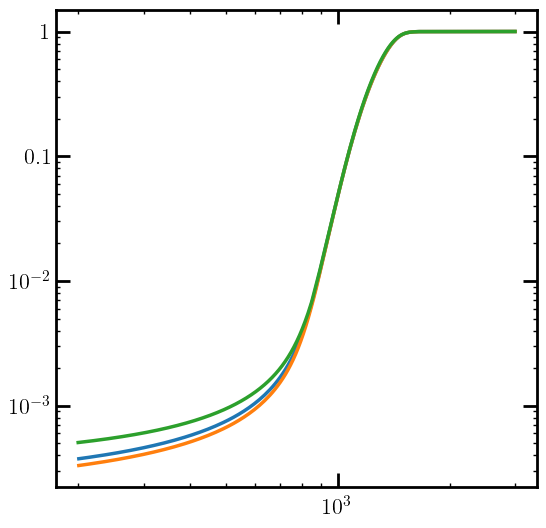

In [274]:
plt.figure()
plt.loglog()
# plt.xlim([1.56e3,3e3])
# plt.axis([1.3e3,2e3,1e-2/5,1e-2*5])
plt.plot(baseline['rs'], baseline['x'][:,0])
plt.plot(fudge['rs'], fudge['x'][:,0])
plt.plot(hyrec_test['rs'], hyrec_test['x'][:,0])

For the Recfast comparison:
- We have to be very careful about where the fudge factors are, since there's one explicitly in $\alpha$, one implicitly in $\beta$ since we calculate it using detailed balance on $\alpha$, and one in $\mathcal{C}$ since it uses $\beta$.  Once all of these are accounted for we get agreement, otherwise we don't.
- We must use a fudge factor of 1.14 to compare to Fig 3 of Hyrec, not our default of 1.125

In [38]:
import csv

with open('/Users/gregoryridgway/Desktop/Webplot Digitizer/DHv2/EMLA.csv') as csvfile:
    reader = csv.reader(csvfile)
    EMLA_data = []
    for row in reader:
        EMLA_data.append([float(r) for r in row])
        
    EMLA_data = np.array(EMLA_data)
    
with open('/Users/gregoryridgway/Desktop/Webplot Digitizer/DHv2/Recfast.csv') as csvfile:
    reader = csv.reader(csvfile)
    Rec_data = []
    for row in reader:
        Rec_data.append([float(r) for r in row])
        
    Rec_data = np.array(Rec_data)

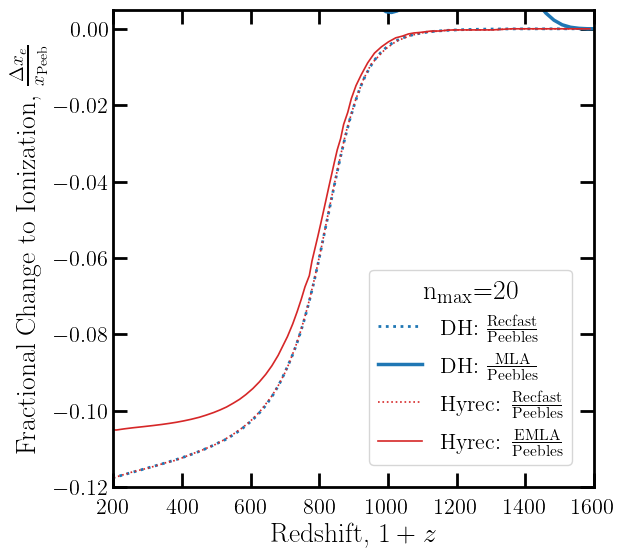

In [276]:
plt.figure()
# plt.loglog()
# plt.xscale('log')
plt.axis([200,1600, -.12,.005])
# plt.plot(baseline['rs'], baseline['x'][:,0])
# plt.plot(baseline['rs'], phys.xHII_std(baseline['rs']))
plt.plot(fudge['rs'], fudge['x'][:,0]/baseline['x'][:,0]-1, 
         color='C0', linestyle=':', linewidth = 2.0, 
         label=r'DH: $\frac{\mathrm{Recfast}}{\mathrm{Peebles}}$')
plt.plot(hyrec_test['rs'][::16], hyrec_test['x'][::16,0]/baseline['x'][:,0]-1, 
         label=r'DH: $\frac{\mathrm{MLA}}{\mathrm{Peebles}}$')

lw = 1.2
plt.plot(Rec_data[:,0], Rec_data[:,1], color='C3', 
         linewidth = lw, linestyle = ':', 
         label=r'Hyrec: $\frac{\mathrm{Recfast}}{\mathrm{Peebles}}$')
plt.plot(EMLA_data[:,0], EMLA_data[:,1], color='C3', 
         linewidth = lw, linestyle = 'solid', 
         label=r'Hyrec: $\frac{\mathrm{EMLA}}{\mathrm{Peebles}}$')

plt.xlabel(r'Redshift, $1+z$', fontsize=20)
plt.ylabel(r'Fractional Change to Ionization, $\frac{\Delta x_e}{x_{\mathrm{Peeb}}}$', fontsize=20)
# plt.ylabel(r'Occupation Number', fontsize=20)
plt.legend(title=r'$\mathrm{n_{max}}$='+str(nmax))

# plt.title(r'Testing the TLA Assumptions')

## Trying to fix the ODE solver

In [40]:
from scipy.integrate import odeint

In [41]:
def compton_cooling_rate(xHII, T_m, rs):
    xe = xHII

    return (
        4 * phys.thomson_xsec * 4 * phys.stefboltz / phys.me
        * xe * phys.nH*rs**3 * (phys.TCMB(rs) - T_m)
        * phys.TCMB(rs)**4
    )

In [198]:
MLA_switch = False

if not MLA_switch:
    def beta_tmp(*args):
        rs, xe, Tm = args

        tau = atomic.tau_np_1s(2,rs)
        x2s = atomic.x2s_steady_state(rs, phys.TCMB(rs), Tm, xe, 1-xe, tau)
        x2  = 4*x2s
        beta_ion = phys.beta_ion(Tm, 'HI')

        return beta_ion * x2

    def alpha_tmp(*args):
        Tm, = args
        return phys.alpha_recomb(Tm, 'HI')
    
else:
    kind='linear'
    
    alpha_tmp = interp1d(rs_vec, alpha_MLA, kind=kind, fill_value='extrapolate')
    beta_tmp  = interp1d(rs_vec, beta_MLA, kind=kind)

Try Saha, then TLA, then MLA

In [137]:
import warnings

rs_div = 1.6e3

def tmp_tla(rs_vec, init, alpha_tmp, beta_tmp, mxstep=1000, rtol=1e-3):
    
    def xHII(yHII):
        return 0.5 + 0.5*np.tanh(yHII)

    def derivs(rs, var):
        nH = phys.nH*rs**3

        def dlogT_dz(yHII, log_T_m, rs):

            T_m, xe = np.exp(log_T_m), xHII(yHII)
            xHI = 1 - xHII(yHII)
            
            xe = phys.xHII_std(rs)

            adiabatic_cooling_rate = 2 * T_m/rs

            return 1 / T_m * adiabatic_cooling_rate + 1 / T_m * (
                phys.dtdz(rs)*(
                    compton_cooling_rate(
                        xHII(yHII), T_m, rs
                    )
                )
            )/ (3/2 * nH * (1 + phys.chi + xe))

        def dyHII_dz(yHII, log_T_m, rs):

            T_m, xe = np.exp(log_T_m), xHII(yHII)

            if 1 - xHII(yHII) < 1e-6 and rs < 100:
                return 0

            if xHII(yHII) > 0.99 and rs > rs_div:
                # Use the Saha value. 
                return 2 * np.cosh(yHII)**2 * phys.d_xe_Saha_dz(rs, 'HI')

            ne = xe * nH
            xHI = 1 - xHII(yHII)
            
            

            if not MLA_switch:
#                 print(rs, alpha_tmp(T_m) * xHII(yHII) * xe * nH, 
#                       beta_tmp(rs, xe, T_m))
                return 2 * np.cosh(yHII)**2 * phys.dtdz(rs) * (
                    -(alpha_tmp(T_m) * xHII(yHII) * xe * nH - beta_tmp(rs, xe, T_m))
                )
            else:
                
#                 print(rs, alpha_tmp(rs), beta_tmp(rs))
                return 2 * np.cosh(yHII)**2 * phys.dtdz(rs) * (
                    -(alpha_tmp(rs) * xHII(yHII) * xe * nH - beta_tmp(rs))
                )
                
#                 with warnings.catch_warnings():
#                     warnings.filterwarnings('error')
#                     try:
#                         return 2 * np.cosh(yHII)**2 * phys.dtdz(rs) * (
#                             -(alpha_tmp(rs) * xHII(yHII) * xe * nH - beta_tmp(rs))
#                         )
#                     except RuntimeWarning:
#                         print(rs, yHII)
#                         return 2 * np.cosh(yHII)**2 * phys.dtdz(rs) * (
#                             -(alpha_tmp(rs) * xHII(yHII) * xe * nH - beta_tmp(rs))
#                         )
                    

        log_T_m, yHII = var[0], var[1]
        
#         print(rs, 
#               dlogT_dz(yHII, log_T_m, rs),
#              dyHII_dz(yHII, log_T_m, rs)
#         )

        return [
            dlogT_dz(yHII, log_T_m, rs),
            dyHII_dz(yHII, log_T_m, rs)
        ]

    if MLA_switch: print('MLA')
    else: print('TLA')

    
    soln = odeint(
        derivs, init, rs_vec,
        mxstep = mxstep, tfirst=True, rtol=rtol
    )

    soln[:,0] = np.exp(soln[:,0])
    soln[:,1] = xHII(soln[:,1])

    return soln
        
    if False:
        
        print('MLA')
        
        # Number of attempts before giving up. 
        N_attempts = 0
        # Flag to determine if solution was reached.
        solved = False

        # List of indices (m_m, Q) where the solution failed. 
        error_arr = [] 

        while (not solved) and (N_attempts < 10):
            # Keep attempting until solved or we've tried twice. 

            try:

                # Solve using solve_ivp. 
                soln = solve_ivp(
                    derivs, [rs_vec[0], rs_vec[-1]], init_cond, 
                    method='LSODA', t_eval=rs_vec, 
                    rtol=rtol, max_step= mxstep
                )

            except:
                # solve_ivp returned an error. Adjust the tolerance
                # and step size and try again. 

                rtol /= 1.2
                mxstep /= 1.5

            else:
                # solve_ivp completed successfully. However, we still need to check
                # that the solution managed to integrate over the entire redshift range,
                # and that there are no NaNs in the solution.
                if soln['t'].size == rs_vec.size and not np.isnan(soln['y']).any():
                    solved = True
                else:
                    N_attempts += 1
                    print('TRY AGAIN: try', N_attempts)

        if not solved:
            # If solution fails, simply return False. 
            soln = False
            print('NOT SOLVED')
        else:
            new_soln = np.zeros((len(soln['y'][0]), 2))
            new_soln[:,0] = np.exp(soln['y'][0])
            new_soln[:,1] = xHII(soln['y'][1])
            return new_soln

In [138]:
rs_list = np.logspace(np.log10(3e3),np.log10(1e2), 100)

# rs_list = np.logspace(np.log10(rs_div),np.log10(1e2), 100)

start_rs = rs_list[0]
init_cond = np.array([
    np.log(phys.Tm_std(start_rs)), 
    np.arctanh(2*(phys.xHII_std(start_rs) - 0.5))
])

In [139]:
soln = tmp_tla(rs_list, init_cond, alpha_tmp, beta_tmp, rtol=1e-3)

if MLA_switch:
    soln_MLA = soln
else:
    soln_TLA = soln

MLA


In [130]:
soln = tmp_tla(rs_list, init_cond, alpha_tmp, beta_tmp, rtol=1e-5)

if MLA_switch:
    soln_MLA = soln
else:
    soln_TLA = soln

TLA


Try printing out the dxde's to see that the values are reasonable

Try changing the step size at the discontinuity

Is there a built in function telling me where this overflow is coming from

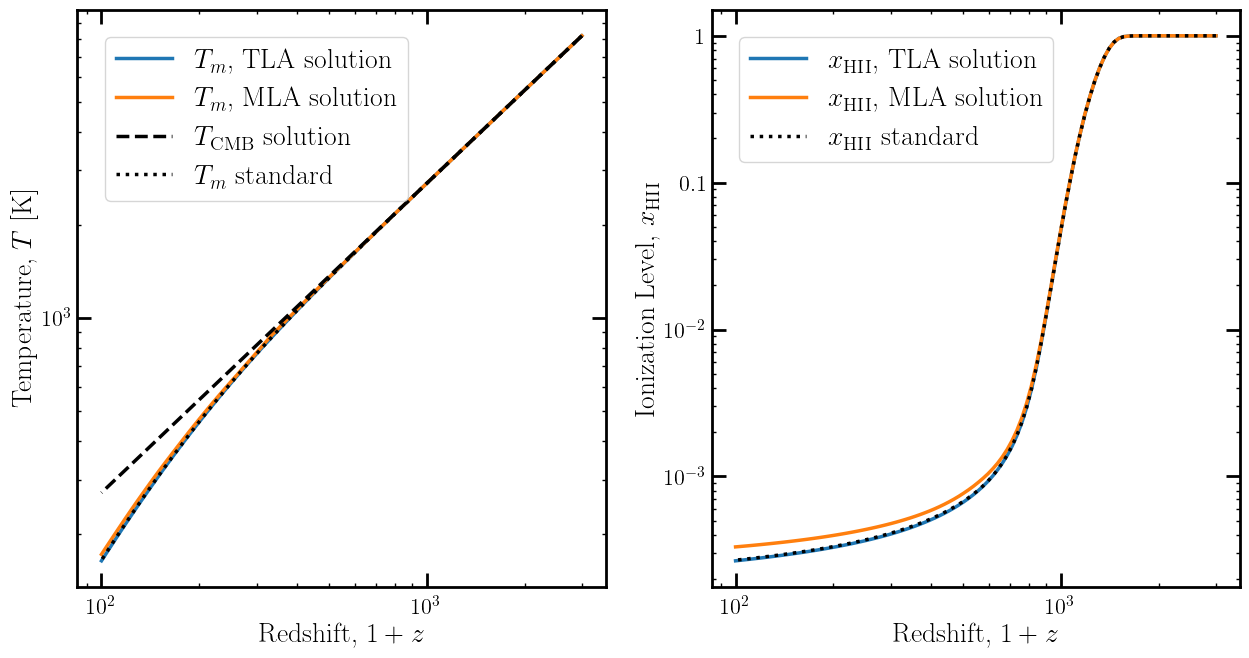

In [140]:
fig, axarr = plt.subplots(1, 2, figsize=(2*7.5, 7.5))


#----- Fig 1 ----#
axarr[0].loglog()
axarr[0].plot(rs_list, soln_TLA[:,0]/phys.kB, label=r'$T_m$, TLA solution')
axarr[0].plot(rs_list, soln_MLA[:,0]/phys.kB, label=r'$T_m$, MLA solution')

axarr[0].plot(rs_list, phys.TCMB(rs_list)/phys.kB, 
              color='k', linestyle='--', label=r'$T_{\mathrm{CMB}}$ solution')
axarr[0].plot(rs_list, phys.Tm_std(rs_list)/phys.kB, 
              color='k', linestyle=':', label=r'$T_m$ standard')
axarr[0].set_xlabel(r'Redshift, $1+z$', fontsize=20)
axarr[0].set_ylabel(r'Temperature, $T$ [K]', fontsize=20)
axarr[0].legend(fontsize=20)
#----------------#
#----------------#



#----- Fig 2 ----#
axarr[1].loglog()
axarr[1].plot(rs_list, soln_TLA[:,1], label=r'$x_{\mathrm{HII}}$, TLA solution')
axarr[1].plot(rs_list, soln_MLA[:,1], label=r'$x_{\mathrm{HII}}$, MLA solution')

axarr[1].plot(rs_list, phys.xHII_std(rs_list), 
              color='k', linestyle=':', label=r'$x_{\mathrm{HII}}$ standard')
axarr[1].set_xlabel(r'Redshift, $1+z$', fontsize=20)
axarr[1].set_ylabel(r'Ionization Level, $x_{\mathrm{HII}}$', fontsize=20)
axarr[1].legend(fontsize=20)

# axarr[1].axvline(rs_div, color='k', linestyle=':')
#----------------#
#----------------#

In [141]:
ind1=5

start_rs = rs_vec[-ind1]
data=np.zeros((length-(ind1-1),2))
data[-1] = np.array([
    np.log(phys.Tm_std(start_rs)), 
    np.arctanh(2*(phys.xHII_std(start_rs) - 0.5))
])

lim = 5
for k in np.arange(lim):
    x2 = x2_vec[-ind1-k]
    Tr = Tr_vec[-ind1-k]
    Tm = Tm_vec[-ind1-k]
    
    beta_tmp  = phys.beta_ion(Tr,'HI') * x2
    alpha_tmp = phys.alpha_recomb(Tm, 'HI')/1.125
    
    rs_diff = rs_vec[-ind1-k:-ind1-(k+2):-1]
    
    soln = tmp_tla(rs_diff, data[-1-k], alpha_tmp, beta_tmp)
    
    data[-2-k] = soln[-1]
    
data[:,0] = np.exp(data[:,0])/phys.kB
data[:,1] = 0.5 + 0.5*np.tanh(data[:,1])

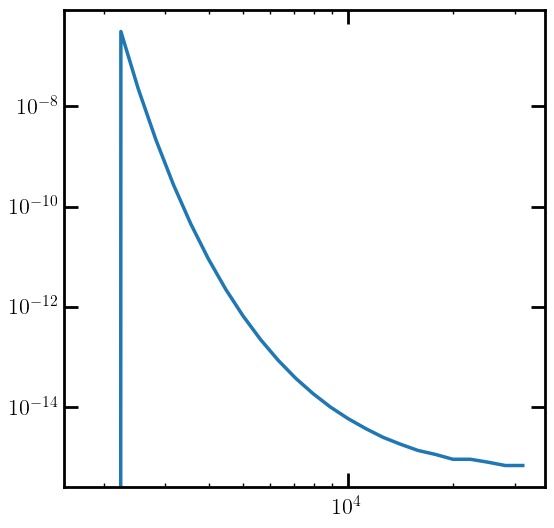

In [127]:
plt.figure()
plt.loglog()
plt.plot(rs_vec[-1-lim:], 1-data[-1-lim:,1])


# Linear Algebra for Distortion

# Distortion

In [949]:
%autoreload
mDM = 3e10
# sigmav = xsec_bound_elec_CMB(mDM,'swave')
tau=1e25
species = 'elec'
DM_process = 'decay'
string = str(int(np.floor(np.log10(mDM))))
test_main = main.evolve(
    DM_process=DM_process, mDM=mDM,
    lifetime=tau,
    primary=species+'_delta',
    start_rs = 3e3,
    coarsen_factor=12, backreaction=False, distort=False,
#     struct_boost=struct_boost,
    end_rs=2.5e3
)

In [950]:
spec10  = test_main['highengphot'][-1]
spec10.redshift(1)

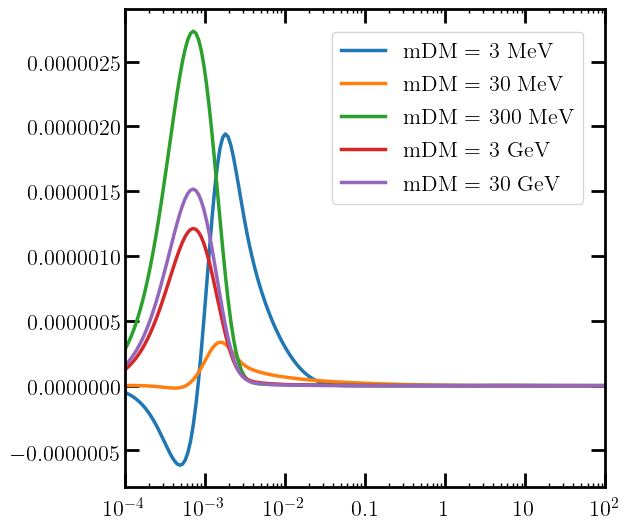

In [951]:
plt.figure()
plt.xscale('log')
plt.xlim([1e-4,100])
plt.plot(spec6.eng, spec6.eng*spec6.dNdE, label='mDM = 3 MeV')
plt.plot(spec.eng, spec.eng*spec.dNdE, label='mDM = 30 MeV')
plt.plot(spec8.eng, spec8.eng*spec8.dNdE, label='mDM = 300 MeV')
plt.plot(spec9.eng, spec9.eng*spec9.dNdE, label='mDM = 3 GeV')
plt.plot(spec10.eng, spec10.eng*spec10.dNdE, label='mDM = 30 GeV')
plt.legend()

$$
I =  \frac{h c E}{4 \pi} \frac{dn}{dE}
$$

In [45]:
hplanck = phys.hbar * 2 * np.pi

nu_range = np.logspace(-1,np.log10(1.75e12), 100)
eng_range = hplanck * nu_range

Text(0, 0.5, 'Intensity, $I_{\\mathrm{CMB}}$')

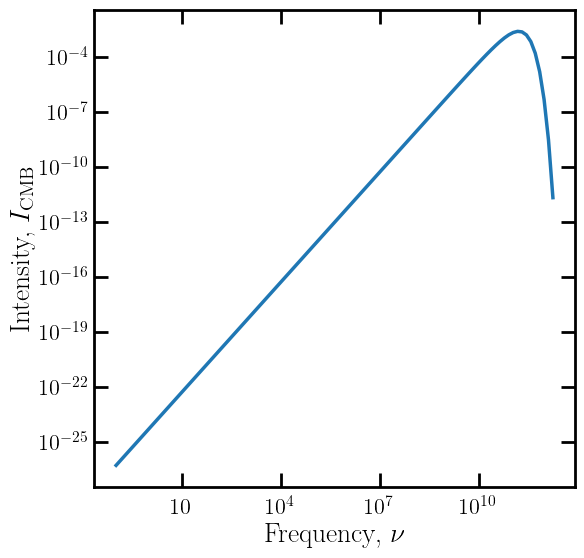

In [52]:
dNdE = phys.CMB_spec(eng_range, phys.TCMB(1))
convert = eng_range * hplanck * phys.c /(4*np.pi)

plt.figure()
plt.loglog()

plt.plot(nu_range, convert * dNdE)
plt.xlabel(r'Frequency, $\nu$', fontsize=20)
plt.ylabel(r'Intensity, $I_{\mathrm{CMB}}$', fontsize=20)